## Spaceship trajectory

0.994
0.0
Number of time steps: 2172


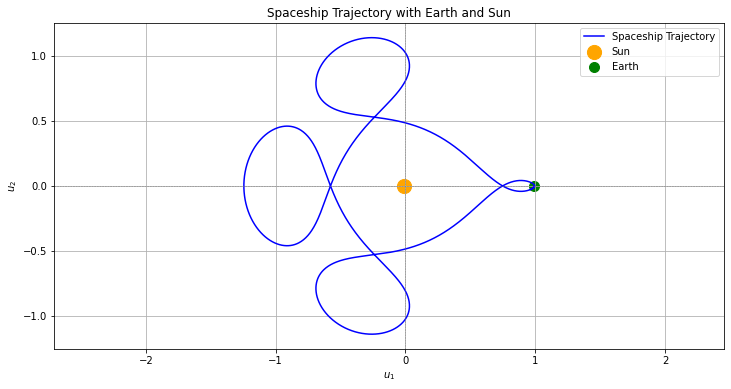

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
mu = 0.012277471
mu_hat = 1 - mu

# Define the system of ODEs
def spaceship_trajectory(t, U):
    u1, v1, u2, v2 = U
    D1 = ((u1 + mu)**2 + u2**2)**(3/2)
    D2 = ((u1 - mu_hat)**2 + u2**2)**(3/2)
    du1_dt = v1
    dv1_dt = u1 + 2 * v2 - mu_hat * (u1 + mu) / D1 - mu * (u1 - mu_hat) / D2
    du2_dt = v2
    dv2_dt = u2 - 2 * v1 - mu_hat * u2 / D1 - mu * u2 / D2
    return [du1_dt, dv1_dt, du2_dt, dv2_dt]

# Initial conditions [u1,v1,u2,v2]
#U0 = [6, 0, 4.0, -2.00158510637908252240537862224]
U0 = [0.994, 0.0, 0.0, -2.00158510637908252240537862224]
t_span = [0, 17.1]

# Solve the system using solve_ivp with adaptive time-stepping
solution = solve_ivp(
    spaceship_trajectory, 
    t_span, 
    U0, 
    method='RK45', 
    atol=1e-12, 
    rtol=1e-12, 
    dense_output=True
)

# Extract solution
u1, u2 = solution.y[0], solution.y[2]
print(u1[0])
print(u2[0])

num_time_steps = len(solution.t)
print(f"Number of time steps: {num_time_steps}")

# Positions of the Sun and Earth
sun_position = (-mu, 0)
earth_position = (1 - mu, 0)

# Plot trajectory with spheres for Earth and Sun
plt.figure(figsize=(12, 6))
plt.plot(u1, u2, label='Spaceship Trajectory', color='blue')
plt.scatter(*sun_position, color='orange', s=200, label='Sun')  # Sun
plt.scatter(*earth_position, color='green', s=100, label='Earth')  # Earth
plt.title('Spaceship Trajectory with Earth and Sun')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


The initial conditions you set (initial position and velocity) seem to place the spacecraft on a trajectory that doesn't exactly correspond to a stable elliptical orbit but to one that has a spiraling effect due to interactions between the Sun and Earth.

Number of time steps: 171000


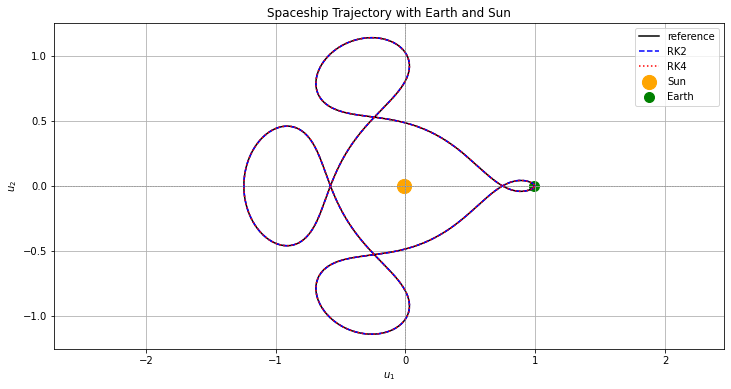

In [37]:
# now try with your own method 

#T = np.linspace(t_span[0],t_span[1],10)
h = 0.0001
T = np.arange(t_span[0],t_span[1],h)
print(f"Number of time steps: {len(T)}")

def RK2(f,U0,T,h):
    # f is f(t,y(t))
    # T is the time span
    # h is the time step
    # U0 are the initial conditions
    U = np.zeros([len(U0), len(T)])
    U[:,0] = U0
    for i, t in enumerate(T[:-1]):
        k1 = np.asarray(f(t, U[:, i]))
        k2 = np.asarray(f(t + h / 2, U[:, i] + h / 2 * k1))
        U[:, i + 1] = U[:, i] + h * k2
    return U

def RK4(f,U0,T,h):
    # f is f(t,y(t))
    # T is the time span
    # h is the time step
    # U0 are the initial conditions
    U = np.zeros([len(U0), len(T)])
    U[:,0] = U0
    for i, t in enumerate(T[:-1]):
        k1 = np.asarray(f(t, U[:,i]))
        k2 = np.asarray(f(t+h/2,U[:,i]+h/2*k1))
        k3 = np.asarray(f(t+h/2,U[:,i]+h/2*k2))
        k4 = np.asarray(f(t,U[:,i]+h*k3))
        U[:,i+1] = U[:,i] + 1/6*h*(k1+2*k2+2*k3+k4)
    return U

U = RK2(spaceship_trajectory,U0,T,h)
u1_rk2 = U[0,:]
u2_rk2 = U[2,:]
U = RK4(spaceship_trajectory,U0,T,h)
u1_rk4 = U[0,:]
u2_rk4 = U[2,:]
#print(u1_rk2)

# Plot trajectory with spheres for Earth and Sun
plt.figure(figsize=(12, 6))
plt.plot(u1, u2, label='reference', color='black')
plt.plot(u1_rk2, u2_rk2, label='RK2', color='blue', linestyle='--')
plt.plot(u1_rk4, u2_rk4, label='RK4', color='red', linestyle=':')
plt.scatter(*sun_position, color='orange', s=200, label='Sun')  # Sun
plt.scatter(*earth_position, color='green', s=100, label='Earth')  # Earth
plt.title('Spaceship Trajectory with Earth and Sun')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
